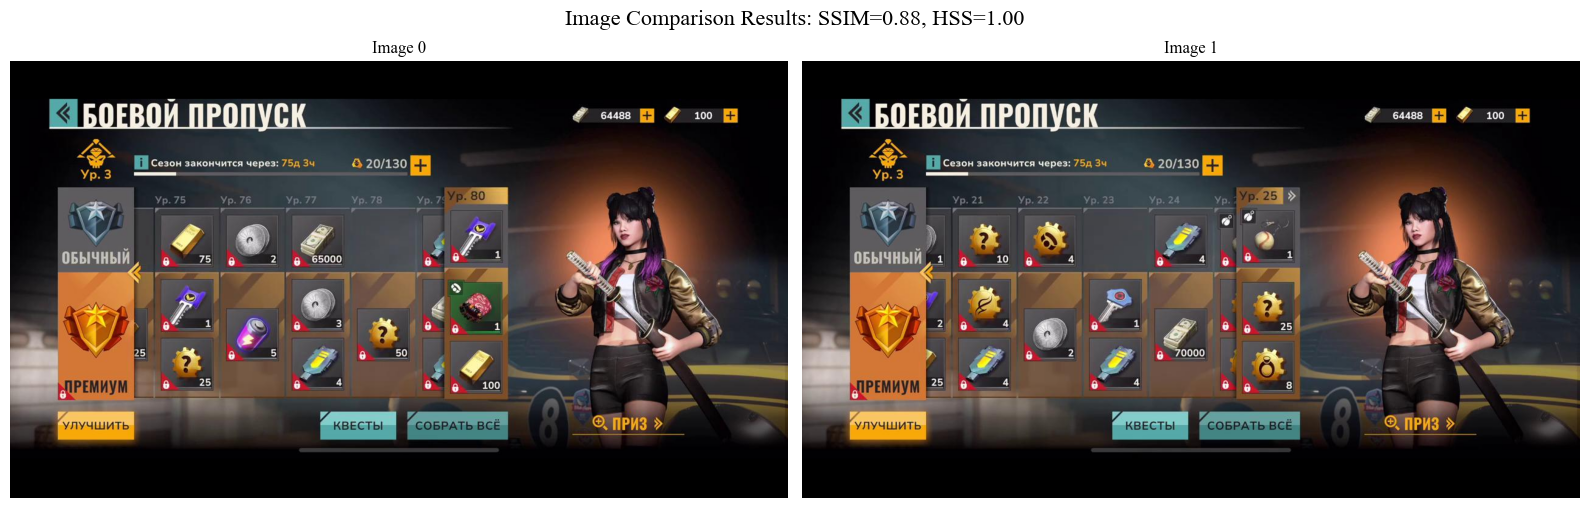

Comparison between image 2 and image 2:
SSIM Score: 0.8769080820994759
MSE Score: 0.004821729684329215
Histogram Similarity Score: 0.9995191483281071



In [37]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize
import os
import matplotlib.pyplot as plt


class ImageComparator:
    @staticmethod
    def _get_ssim(image1: np.ndarray, image2: np.ndarray) -> float:
        gray_image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
        gray_image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
        gray_image1_resized = resize(gray_image1, (256, 256), anti_aliasing=True)
        gray_image2_resized = resize(gray_image2, (256, 256), anti_aliasing=True)
        return ssim(gray_image1_resized, gray_image2_resized, data_range=1.0)

    @staticmethod
    def _get_mse(image1: np.ndarray, image2: np.ndarray) -> float:
        image1_resized = resize(image1, (256, 256), anti_aliasing=True)
        image2_resized = resize(image2, (256, 256), anti_aliasing=True)
        return np.mean((image1_resized - image2_resized) ** 2)

    @staticmethod
    def _get_image_hist(image_np: np.ndarray) -> np.ndarray:
        gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
        hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
        return hist

    @staticmethod
    def _score_image_similarity(hist1: np.ndarray, hist2: np.ndarray) -> float:
        score = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
        return score

    @staticmethod
    def compare_images(
        image1: np.ndarray, image2: np.ndarray, method: str = "ssim"
    ) -> float:
        if method == "ssim":
            return ImageComparator._get_ssim(image1, image2)
        elif method == "mse":
            return ImageComparator._get_mse(image1, image2)
        else:
            raise ValueError("Invalid method. Please choose 'ssim' or 'mse'.")


# Read all images from directory
image_dir = "/Users/evlko/Documents/GitHub/Game-Interface-Flows-ML/model/test/"
image_files = os.listdir(image_dir)
images = [cv2.imread(os.path.join(image_dir, file)) for file in image_files]
images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]

# Compare images
for i in range(len(images)):
    for j in range(i + 1, len(images)):
        image1 = images[i]
        image2 = images[j]

        ssim_score = ImageComparator.compare_images(image1, image2, method="ssim")
        mse_score = ImageComparator.compare_images(image1, image2, method="mse")

        hist1 = ImageComparator._get_image_hist(image1)
        hist2 = ImageComparator._get_image_hist(image2)
        hist_score = ImageComparator._score_image_similarity(hist1, hist2)

        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
        axs = axs.ravel()

        title_font = {
            "family": "Times New Roman",
            "color": "#000",
            "weight": "normal",
        }

        images = [image1, image2]

        for i, image in enumerate(images):
            axs[i].imshow(image)
            axs[i].set_title(f"Image {i}", fontdict=title_font)
            axs[i].axis("off")

        plt.tight_layout()
        plt.suptitle(f"Image Comparison Results: SSIM={ssim_score:0.2f}, HSS={hist_score:0.2f}", fontsize=16, fontdict=title_font, y=0.8)
        plt.show()

        print(f"Comparison between image {i+1} and image {j+1}:")
        print(f"SSIM Score: {ssim_score}")
        print(f"MSE Score: {mse_score}")
        print(f"Histogram Similarity Score: {hist_score}")
        print()

        break